In [1]:
from data_class import *
from create_statespace_class import *

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


import seaborn as sns
sns.set_theme(style="whitegrid")

np.random.seed(42)
# choose which app to look at between 'EVOKE' and 'MOMENT'
app = "EVOKE"

# get the data
paths = ['part-00000-tid-5172624987854127169-b1684884-bebf-43d9-bb55-f03708dbec1f-5531-1-c000.json',
         'part-00001-tid-5172624987854127169-b1684884-bebf-43d9-bb55-f03708dbec1f-5532-1-c000.json',
         'part-00002-tid-5172624987854127169-b1684884-bebf-43d9-bb55-f03708dbec1f-5533-1-c000.json',
         'part-00003-tid-5172624987854127169-b1684884-bebf-43d9-bb55-f03708dbec1f-5534-1-c000.json']

In [2]:
# create the data object
data = Data(paths, app)
# create the state space
space = Space(app)

Creating data class object with 55323 observations
Creating state space class object


## Progress

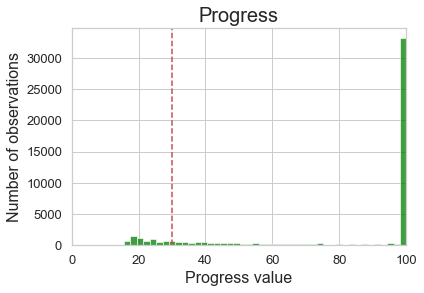

In [6]:
# plot progress and the limit at 30

fig, ax1 = plt.subplots(1, 1, sharey=True, figsize=(6, 4))
sns.histplot(ax=ax1, x=data.progress, bins=50, stat='count', color='green')
ax1.axvline((30), color='r', linestyle='--')
ax1.set_xlim(0, 100)
ax1.set_xlabel('Progress value',fontsize=16)
ax1.set_ylabel('Number of observations',fontsize=16)
plt.title('Progress',fontsize=20)
plt.tick_params(labelsize=13)
plt.savefig("plots/progress_hist.png",bbox_inches="tight")

## Usage count

<AxesSubplot:>

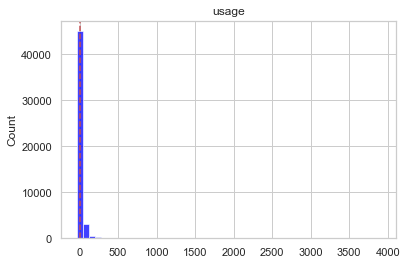

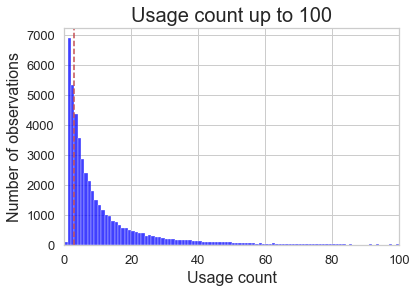

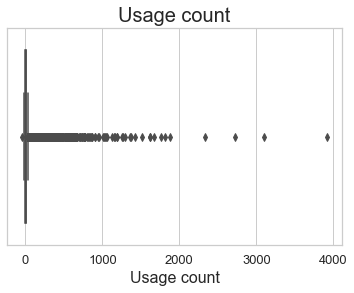

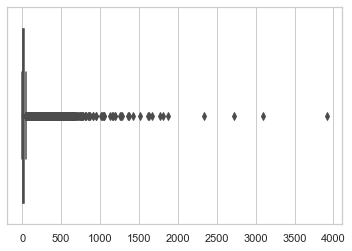

In [20]:
# plot usage count and limit 3

# histogram
fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(6, 4))
sns.histplot(ax=ax1, x=data.usage, bins=50, stat='count',color='blue')
ax1.axvline((3), color='r', linestyle='--')
#ax1.set_xlim(0, 100)
ax1.title.set_text('usage')
#plt.savefig("usage_hist_all.png")



# histogram for low values
usage_low = [i for i in data.usage if 0 <= i <= 100]

fig, (ax3) = plt.subplots(1, 1, sharey=True, figsize=(6, 4))
sns.histplot(ax=ax3, x=usage_low, bins=100, stat='count',color='blue')
ax3.axvline((3), color='r', linestyle='--')
ax3.set_xlim(0, 100)
ax3.set_xlabel('Usage count',fontsize=16)
ax3.set_ylabel('Number of observations',fontsize=16)
plt.title('Usage count up to 100',fontsize=20)
plt.tick_params(labelsize=13)
plt.savefig("plots/usage_hist_100.png",bbox_inches="tight")


# boxplot
fig, (ax2) = plt.subplots(1, 1, sharey=True, figsize=(6, 4))
sns.boxplot(ax=ax2, x=data.usage,color='blue')
#ax2.axvline(np.mean(np.asarray(dataBI1[node])), color='r', linestyle='--')
#ax2.set_xlim(-4, 4)
ax2.set_xlabel('Usage count',fontsize=16)
#ax2.set_ylabel('Number of observations',fontsize=16)
plt.title('Usage count',fontsize=20)
plt.tick_params(labelsize=13)
plt.savefig("plots/usage_box_all.png",bbox_inches="tight")


usage_high = [i for i in data.usage if 3 <= i]

# boxplot
fig, (ax2) = plt.subplots(1, 1, sharey=True, figsize=(6, 4))
sns.boxplot(ax=ax2, x=usage_high,color='blue')
#ax2.title.set_text('usage box plot above 2')



## Duration days

49252
49208


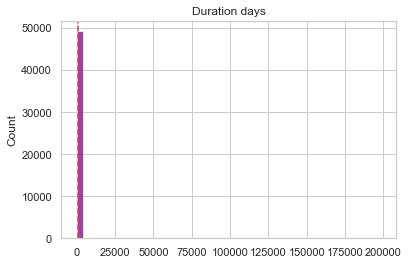

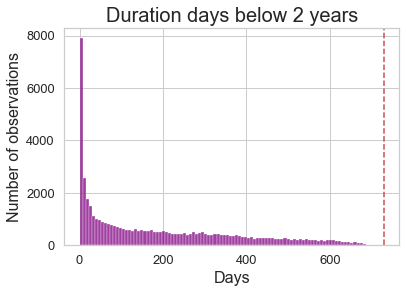

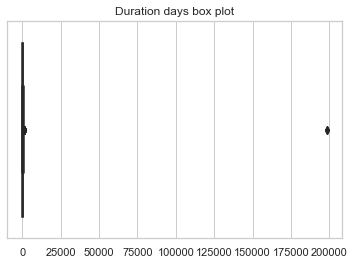

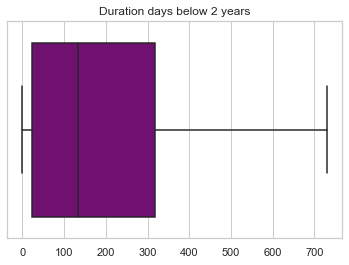

In [5]:
# plot duration days and limit 

# histogram
fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(6, 4))
sns.histplot(ax=ax1, x=data.duration, bins=50, stat='count',color='purple')
ax1.axvline((365*2), color='r', linestyle='--')
#ax1.set_xlim(0, 100)
ax1.title.set_text('Duration days')
#plt.savefig("duration_hist_all.png")

# histogram for low values
duration_low = [i for i in data.duration if 0 <= i <= 2*365]
print(len(data.duration))
print(len(duration_low))


fig, (ax3) = plt.subplots(1, 1, sharey=True, figsize=(6, 4))
sns.histplot(ax=ax3, x=duration_low, bins=100, stat='count',color='purple')
ax3.axvline((365*2), color='r', linestyle='--')
#ax3.set_xlim(0, 100)
ax3.set_xlabel('Days',fontsize=16)
ax3.set_ylabel('Number of observations',fontsize=16)
plt.title('Duration days below 2 years',fontsize=20)
plt.tick_params(labelsize=13)
#ax3.title.set_text('Duration days below 2 years')
plt.savefig("plots/duration_hist_limited.png",bbox_inches="tight")

# boxplot
fig, (ax2) = plt.subplots(1, 1, sharey=True, figsize=(6, 4))
sns.boxplot(ax=ax2, x=data.duration,color='purple')
#ax2.axvline(np.mean(np.asarray(dataBI1[node])), color='r', linestyle='--')
#ax2.set_xlim(-4, 4)
ax2.title.set_text('Duration days box plot')
#plt.savefig("duration_box_all.png")

fig, (ax3) = plt.subplots(1, 1, sharey=True, figsize=(6, 4))
sns.boxplot(ax=ax3, x=duration_low,color='purple')
ax3.title.set_text('Duration days below 2 years')
#plt.savefig("duration_box_limited.png")

## Programs per user

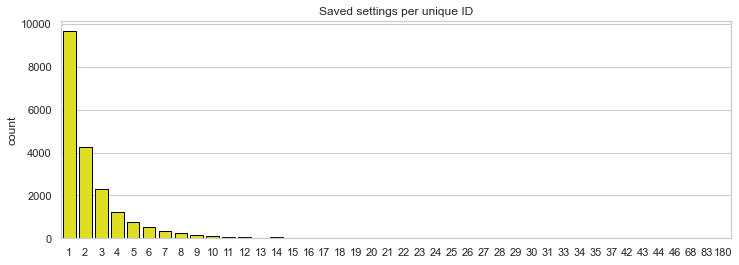

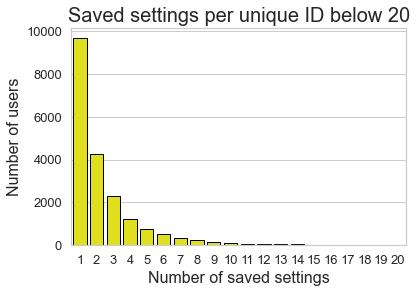

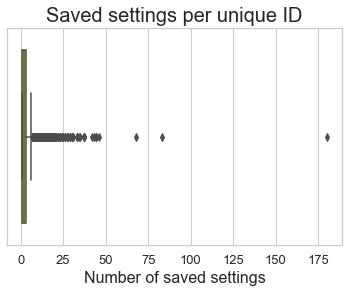

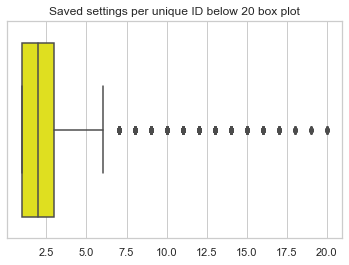

In [19]:
# plot histogram of number of programs per user

# histogram
fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(12, 4))
sns.countplot(ax=ax1, x=data.ID_counts, color='yellow', edgecolor='black')
#ax1.axvline((20), color='r', linestyle='--')
#ax1.set_xlim(0, 100)
ax1.title.set_text('Saved settings per unique ID')
#plt.savefig("settings_per_ID_hist_all.png")

# histogram for low values
counts_low = [i for i in data.ID_counts if 0 <= i <= 20]

fig, (ax3) = plt.subplots(1, 1, sharey=True, figsize=(6, 4))
sns.countplot(ax=ax3, x=counts_low,color='yellow', edgecolor='black')
#ax3.axvline((20), color='r', linestyle='--')
#ax3.title.set_text('')
ax3.set_xlabel('Number of saved settings',fontsize=16)
ax3.set_ylabel('Number of users',fontsize=16)
plt.title('Saved settings per unique ID below 20',fontsize=20)
plt.tick_params(labelsize=13)
plt.savefig("plots/settings_per_ID_hist_20.png",bbox_inches="tight")

# boxplot
fig, (ax2) = plt.subplots(1, 1, sharey=True, figsize=(6, 4))
sns.boxplot(ax=ax2, x=data.ID_counts,color='yellow')
#ax2.axvline(np.mean(np.asarray(dataBI1[node])), color='r', linestyle='--')
#ax2.set_xlim(-4, 4)
ax2.set_xlabel('Number of saved settings',fontsize=16)
#ax2.set_ylabel('Number of users',fontsize=16)
plt.title('Saved settings per unique ID',fontsize=20)
plt.tick_params(labelsize=13)
plt.savefig("settings_per_ID_box_all.png",bbox_inches="tight")

# boxplot
fig, (ax2) = plt.subplots(1, 1, sharey=True, figsize=(6, 4))
sns.boxplot(ax=ax2, x=counts_low,color='yellow')
#ax2.axvline(np.mean(np.asarray(dataBI1[node])), color='r', linestyle='--')
#ax2.set_xlim(-4, 4)
ax2.title.set_text('Saved settings per unique ID below 20 box plot')
#plt.savefig("settings_per_ID_box_20.png")

# Environments and intents

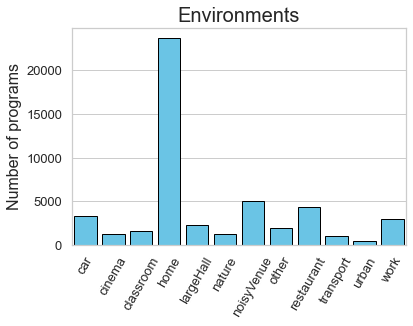

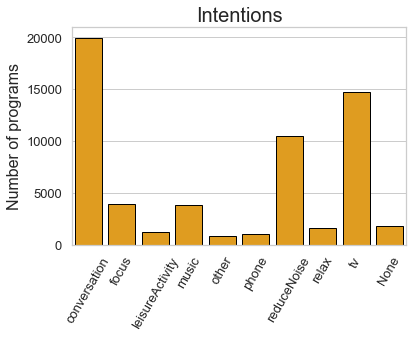

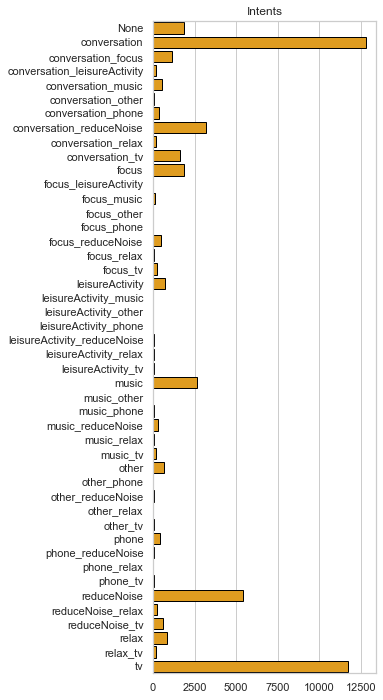

In [3]:
env_titles, env_counts = np.unique(np.asarray(data.envs), return_counts=True)

fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(6,4))
sns.barplot(ax=ax1, x=env_titles, y=env_counts, color="#55CEFA", edgecolor='black')
#ax1.axhline((3000), color='r', linestyle='--')
plt.xticks(rotation=60)
#ax1.title.set_text('Environments')
#ax1.set_xlabel('Number of saved settings',fontsize=16)
ax1.set_ylabel('Number of programs',fontsize=16)
plt.title('Environments',fontsize=20)
plt.tick_params(labelsize=13)
plt.savefig("plots/environments_hist_all.png", bbox_inches='tight')



# prevalence of each individual intention
intention_titles = space.intents.copy()
intention_titles.append('None')
intention_count = np.zeros(10)

for observation in data.intent_list:
    for intent in observation:
        for i, intention in enumerate(intention_titles):
            if intent == intention:
                intention_count[i] += 1
                    

# histogram intents
fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(6, 4))
sns.barplot(ax=ax1, x=intention_titles, y=intention_count, color="orange", edgecolor='black')
#ax1.axhline((1000), color='r', linestyle='--')
plt.xticks(rotation=60)
#ax1.title.set_text('Intents')
ax1.set_ylabel('Number of programs',fontsize=16)
plt.title('Intentions',fontsize=20)
plt.tick_params(labelsize=13)
plt.savefig("plots/intents_hist_individual.png", bbox_inches='tight')



intent_titles, intent_counts = np.unique(np.asarray(data.intents), return_counts=True)

# histogram intents
fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(4, 12))
sns.barplot(ax=ax1, y=intent_titles, x=intent_counts, color="orange", edgecolor='black')
#ax1.axhline((1000), color='r', linestyle='--')
#plt.xticks(rotation=90)
ax1.title.set_text('Intents')
#plt.savefig("intents_hist_all.png")





# States

[Text(0.5, 0, 'Number of settings in the state'), Text(0.5, 1.0, 'States')]

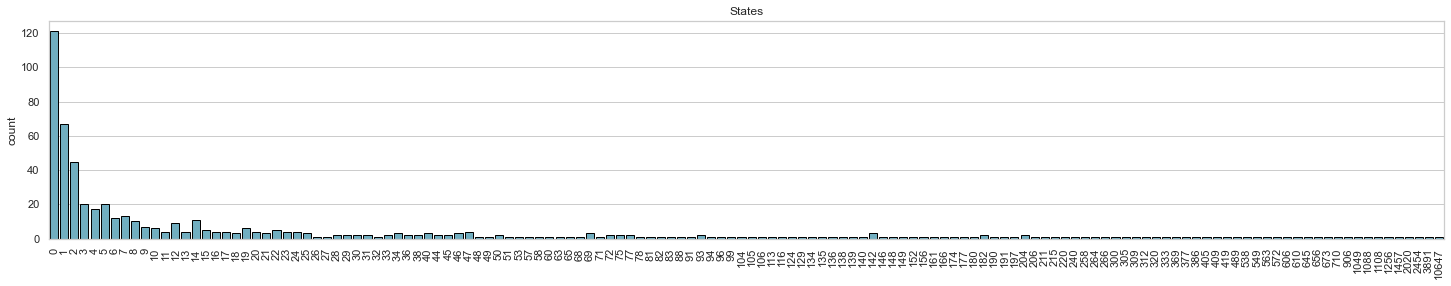

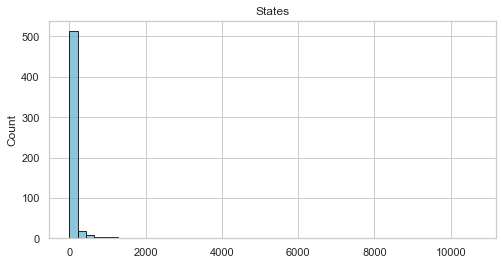

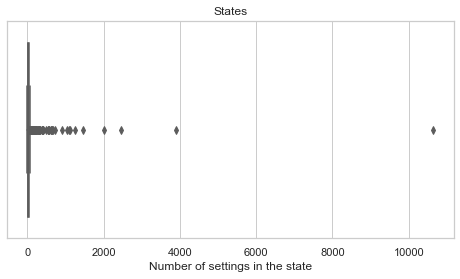

In [8]:
# how many states have x programs in them

state_titles, state_counts = np.unique(np.asarray(data.states), return_counts=True)
zeros = np.zeros(len(space.states)-len(state_titles))
state_counts2 = np.hstack((state_counts,zeros))
state_counts2 = state_counts2.astype(int)

fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(25, 4))
sns.countplot(ax=ax1, x=state_counts2, color="c", edgecolor='black')
#ax1.axhline((1000), color='r', linestyle='--')
plt.xticks(rotation=90)
ax1.title.set_text('States')

fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(8, 4))
sns.histplot(ax=ax1, x=state_counts2, bins=50, color="c", edgecolor='black')
#ax1.axhline((1000), color='r', linestyle='--')
#plt.xticks(rotation=90)
ax1.title.set_text('States')

fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(8, 4))
sns.boxplot(ax=ax1, x=state_counts2, color="c")
#ax1.axhline((1000), color='r', linestyle='--')
#plt.xticks(rotation=90)
ax1.set(xlabel='Number of settings in the state',
       title='States')


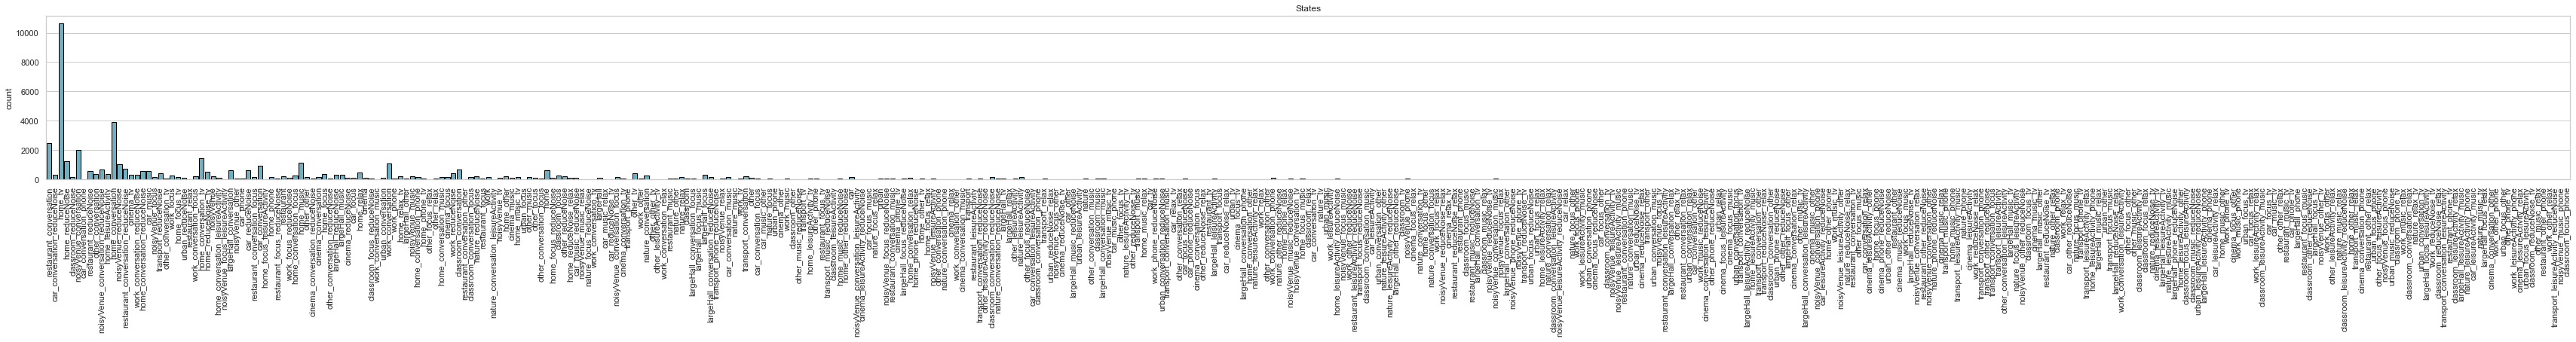

In [9]:
# countplot states all
fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(60, 4))
sns.countplot(ax=ax1, x=data.states, color="c", edgecolor='black')
#ax1.axhline((1000), color='r', linestyle='--')
plt.xticks(rotation=90)
ax1.title.set_text('States')
#plt.savefig("states_hist_all_horizontal.png")


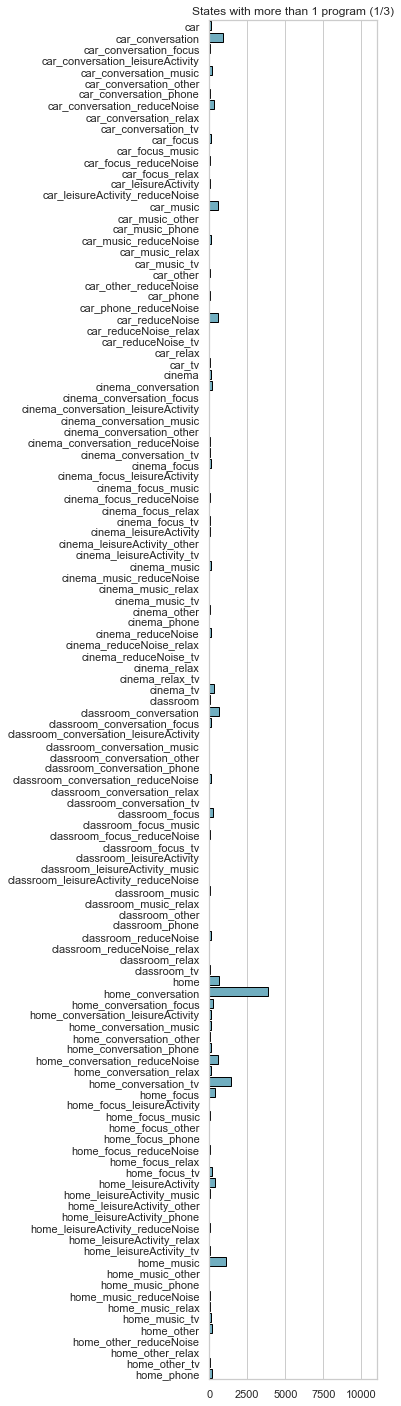

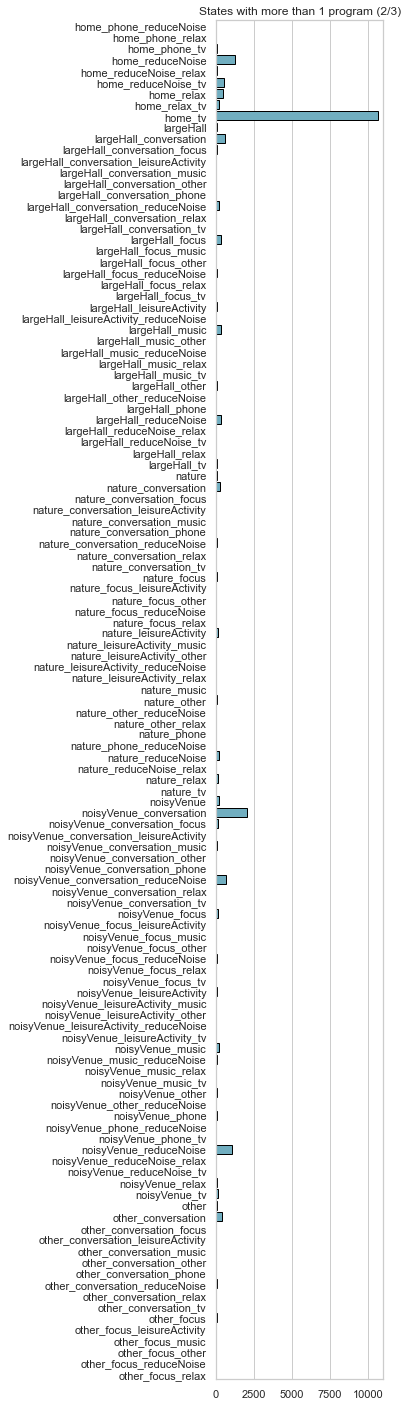

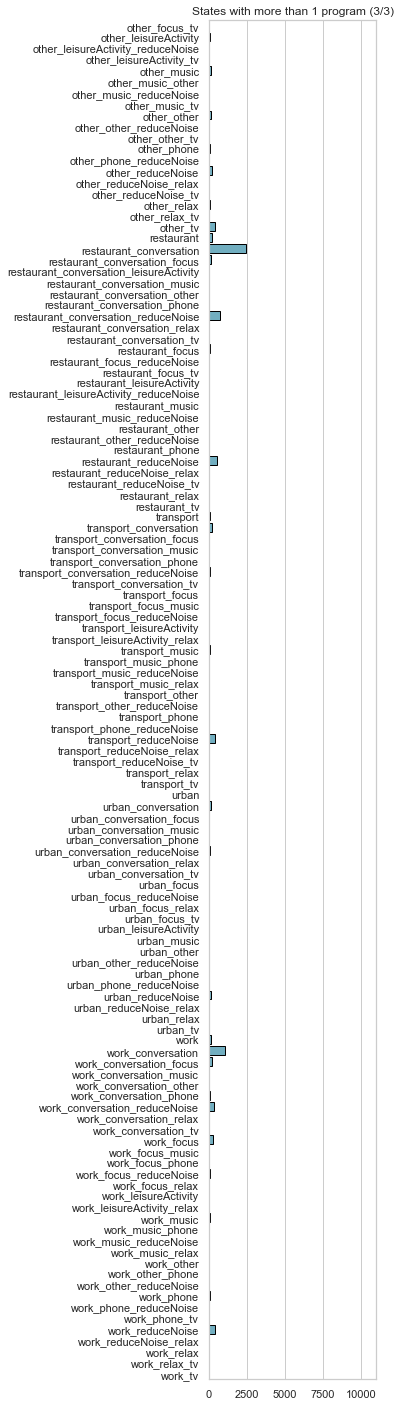

In [10]:
# Make several state plots
state_titles, state_counts = np.unique(np.asarray(data.states), return_counts=True)
state_titles_over1 = [title for i, title in enumerate(state_titles) if state_counts[i] != 1]
state_counts_over1 = [count for count in state_counts if count != 1]
third = len(state_titles_over1)//3
state_titles1 = state_titles_over1[:third]
state_counts1 = state_counts_over1[:third]
state_titles2 = state_titles_over1[third:2*third]
state_counts2 = state_counts_over1[third:2*third]
state_titles3 = state_titles_over1[2*third:]
state_counts3 = state_counts_over1[2*third:]

fig, (ax1) = plt.subplots(1, 1, sharey=False, figsize=(3, 25))
sns.barplot(ax=ax1, y=state_titles1, x=state_counts1, color='c', edgecolor='black')
ax1.title.set_text('States with more than 1 program (1/3)')
ax1.set_xlim(0, 11000)
plt.savefig("plots/states_hist_half_vertical1.png")

fig, (ax2) = plt.subplots(1, 1, sharey=False, figsize=(3, 25))
sns.barplot(ax=ax2, y=state_titles2, x=state_counts2, color='c', edgecolor='black')
ax2.title.set_text('States with more than 1 program (2/3)')
ax2.set_xlim(0, 11000)
plt.savefig("plots/states_hist_half_vertical2.png")

fig, (ax2) = plt.subplots(1, 1, sharey=False, figsize=(3, 25))
sns.barplot(ax=ax2, y=state_titles3, x=state_counts3, color='c', edgecolor='black')
ax2.title.set_text('States with more than 1 program (3/3)')
ax2.set_xlim(0, 11000)
plt.savefig("plots/states_hist_half_vertical3.png")

# Programs removed by filtering

In [11]:
progress_count = 0
duration_count = 0
usage_count_count = 0
demo_count = 0
env_other_count = 0
int_other_count = 0
int_none_count = 0
int_2other_count = 0

for i in range(data.N):
    if data.progress[i] < 30:
        progress_count += 1
    if data.usage[i] < 3:
        usage_count_count += 1
    if data.duration[i] > 365*2:
        duration_count += 1
    if np.all(np.asarray(data.vector_y[i]) == 0.5):
        demo_count += 1
    if data.envs[i] == 'other':
        env_other_count += 1
    if len(data.intent_list[i]) == 1 and data.intents[i] == 'other':
        int_other_count += 1
    if len(data.intent_list[i]) == 1 and data.intents[i] == 'None':
        int_none_count += 1
    if len(data.intent_list[i]) == 2 and np.any(np.asarray(data.intent_list[i]) == 'other'):
        int_2other_count += 1
        
        
        
print("Number observations removed due to progress < 30 is: {}".format(progress_count))
print("Number observations removed due to usage count < 3 is: {}".format(usage_count_count))
print("Number observations removed due to duration > 365*2 is: {}".format(duration_count))
print("Number observations removed due to demo behaviour is: {}".format(demo_count))
print("Number observations removed due to environment chosen as 'other' is: {}".format(env_other_count))
print("Number observations removed due to intent chosen as 'other' is: {}".format(int_other_count))
print("Number observations removed due to no intent chosen is: {}".format(int_none_count))
print("Number observations where one of the 2 chosen intents was 'other' and it is: {}".format(int_2other_count))

print("--------------------------------------")
# number of programs per user
print("total number of unique users {}".format(len(data.unique_IDs)))

ID_high = [data.unique_IDs[i] for i, count in enumerate(data.ID_counts) if count >20]
print("number of unique users with more than 20 programs is {}".format(len(ID_high)))
remove = [i for i in range(data.N) if data.IDs[i] in ID_high]
print("number of observations removed due to more than 20 programs per ID: {}".format(len(remove)))

print("--------------------------------------")
# number of unique states
state_titles, state_counts = np.unique(np.asarray(data.states), return_counts=True)
print("total number of unique states actually represented in the dataset {}".format(len(state_titles)))
states1 = [state_titles[i] for i, count in enumerate(state_counts) if count == 1]
print("number of unique states with only 1 program in it is {}".format(len(states1)))
remove = [i for i in range(data.N) if data.states[i] in states1]
print("number of observations removed due to them being the only setting in their state: {}".format(len(remove)))




Number observations removed due to progress < 30 is: 6823
Number observations removed due to usage count < 3 is: 12381
Number observations removed due to duration > 365*2 is: 44
Number observations removed due to demo behaviour is: 6657
Number observations removed due to environment chosen as 'other' is: 1975
Number observations removed due to intent chosen as 'other' is: 652
Number observations removed due to no intent chosen is: 1868
Number observations where one of the 2 chosen intents was 'other' and it is: 212
--------------------------------------
total number of unique users 19885
number of unique users with more than 20 programs is 46
number of observations removed due to more than 20 programs per ID: 1601
--------------------------------------
total number of unique states actually represented in the dataset 431
number of unique states with only 1 program in it is 67
number of observations removed due to them being the only setting in their state: 67


# Distribution of learned best setting

In [12]:
#  data.settings is a list of arrays and we need it to be a matrix

settings_matrix = np.asarray(data.settings)

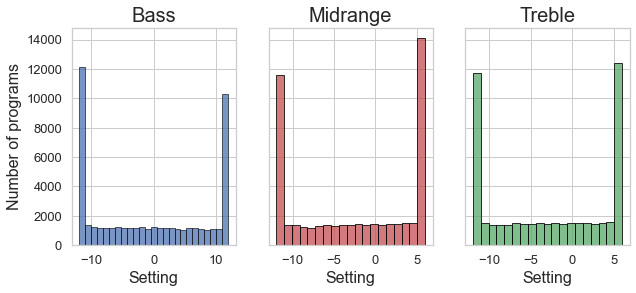

In [13]:
# plot the best learned settings histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(10, 4))
sns.histplot(ax=ax1, x=settings_matrix[:,0], stat='count', bins=25, color='b', edgecolor='black')
ax1.set_ylabel('Number of programs',fontsize=16)
ax1.set_xlabel('Setting',fontsize=16)
ax1.set_title('Bass',fontsize=20)
ax1.tick_params(labelsize=13)

sns.histplot(ax=ax2, x=settings_matrix[:,1], stat='count', bins=19,color='r', edgecolor='black')
#ax2.title.set_text('Midrange')
#ax1.set_ylabel('Number of programs',fontsize=16)
ax2.set_xlabel('Setting',fontsize=16)
ax2.set_title('Midrange',fontsize=20)
ax2.tick_params(labelsize=13)

sns.histplot(ax=ax3, x=settings_matrix[:,2], stat='count', bins=19,color='g', edgecolor='black')
#ax3.title.set_text('Treble')
ax3.set_xlabel('Setting',fontsize=16)
ax3.set_title('Treble',fontsize=20)
ax3.tick_params(labelsize=13)
plt.savefig("plots/barplot_settings.png")


In [14]:
# 3D plot af best settings (we want density, but we have this for now)

def get_3d_setting(state, thresh=0, verbose=False):
    # get settings for the desired state
    set_state = [setting for i, setting in enumerate(data.settings) if data.states[i] == state]
    set_state = np.asarray(set_state)
    if verbose:
        print("Number of settings in {} is {}".format(state, len(set_state)))


    # count how many times each setting occurs
    # make a matrix of the "setting space" spanned by the bass, midrange and treble value options
    # count how many times each appears in the settings for the state
    state_matrix = np.zeros((25, 19, 19))
    for setting in set_state:
        state_matrix[int(setting[0]+12),int(setting[1]+12),int(setting[2]+12)] += 1
    
    if verbose:
        max_val = np.max(state_matrix)
        print("percentage of settings in most popular value is {}".format(100/len(set_state)*max_val))
        x = sorted(state_matrix.flatten())
        print("percentage of settings in 3 most popular values is {}".format(100/len(set_state)*(x[-1]+x[-2]+x[-3])))
    
    # make one vector 
    setting_count = np.zeros(set_state.shape[0])
    for i, setting in enumerate(set_state):
        setting_count[i] = state_matrix[int(setting[0]+12),int(setting[1]+12),int(setting[2]+12)]

    # remove the dots that represent settings with less than threshold instances
    remove = [i for i, count in enumerate(setting_count) if count < thresh]
    for i in sorted(remove, reverse=True):
        set_state = np.delete(set_state,i,0)
        setting_count = np.delete(setting_count,i)
    return set_state, setting_count, state_matrix




In [15]:
def cube_plot(state, set_state, setting_count,threshold, show=False, save=False):
    # make plot with chosen set from matrix
    fig = plt.figure(figsize =(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(set_state[:,0], set_state[:,1], set_state[:,2])
    pnt3d=ax.scatter(set_state[:,0], set_state[:,1], set_state[:,2],c=setting_count, s=setting_count**1.25, cmap='plasma', label=state,edgecolor='face')
    ax.set_xlabel('Bass', fontsize=16)
    ax.set_ylabel('Midrange', fontsize=16)
    ax.set_zlabel('Treble', fontsize=16)
    ax.set_xlim(-12, 12)
    ax.set_ylim(-12, 6)
    ax.set_zlim(-12, 6)
    ax.tick_params(labelsize=13)
    cbar=plt.colorbar(pnt3d)
    cbar.set_label("Count", fontsize=16)
    cbar.ax.tick_params(labelsize=13)
    plt.title(r'Shows state: {}'.format(state),fontsize=20)
    if save:
        plt.savefig(f"plots/cube_{state}_{threshold}.png")
    if show:
        plt.show()
    else:
        if not show:
            plt.close()

Number of settings in home_tv is 10647
percentage of settings in most popular value is 8.00225415610031
percentage of settings in 3 most popular values is 16.63379355687048


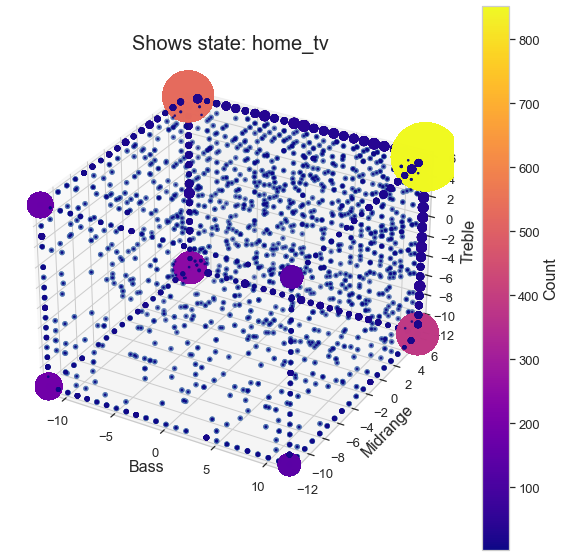

In [16]:
# choose state and threshold
state = 'home_tv'
threshold = 2
set_state, setting_count, state_matrix = get_3d_setting(state, threshold, verbose=True)
cube_plot(state, set_state, setting_count, threshold, show=True)


In [ ]:

# loop over all unique states and create dataframe with percentages
state_titles, state_counts = np.unique(np.asarray(data.states), return_counts=True)
threshold = 2
rows = []
for state in state_titles:
    set_state, setting_count, state_matrix = get_3d_setting(state, threshold, verbose=False)
    cube_plot(state, set_state, setting_count,threshold, show=False, save=True)
    max_val = np.max(state_matrix)
    x = sorted(state_matrix.flatten())
    c3 = None
    c4 = None
    if len(set_state)*max_val != 0:
        c3 = 100/len(set_state)*max_val
    if len(set_state)*(x[-1]+x[-2]+x[-3]) != 0:
        c4 = 100/len(set_state)*(x[-1]+x[-2]+x[-3])
    rows.append([state, len(set_state), c3, c4])
    
df_perc = pd.DataFrame(rows, columns=["state", "count", "max", "max 3"])
final_df = df_perc.sort_values(by=['max 3'], ascending=False)
print(final_df)